In [61]:
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
results_filepath_prefix = '../results/'
result_filename = 'test_channels_serp.csv'
result_filepath = results_filepath_prefix + result_filename

result_df = pd.read_csv(result_filepath)
result_df.head()


,phase,level,component,h_serp_ms
0,burst,0,homepage,-0.054545
1,burst,0,videopage,0.054545
2,burst,1,homepage,-0.063636
3,burst,1,videopage,-0.045455
4,burst,2,homepage,0.072727


In [63]:
result_df['phase_order'] = result_df.apply(
    lambda row: 
        '0' if row['phase']=='create' 
        else '1',
    axis = 1
)
result_df.head()

,phase,level,component,h_serp_ms,phase_order
0,burst,0,homepage,-0.054545,1
1,burst,0,videopage,0.054545,1
2,burst,1,homepage,-0.063636,1
3,burst,1,videopage,-0.045455,1
4,burst,2,homepage,0.072727,1


In [64]:
result_df = result_df.sort_values(by=['phase_order', 'level'])
result_df

,phase,level,component,h_serp_ms,phase_order
10,create,0,homepage,0.000000,0
11,create,0,videopage,-0.018182,0
12,create,1,homepage,0.000000,0
13,create,1,videopage,0.154545,0
14,create,2,homepage,0.000000,0
15,create,2,videopage,-0.009091,0
16,create,3,homepage,0.145455,0
17,create,3,videopage,0.090909,0
18,create,4,homepage,-0.063636,0
19,create,4,videopage,-0.072727,0


In [65]:
result_df['phase_level'] = result_df['phase_order'] + '_' + result_df['phase'] + result_df['level'].astype('str')
result_df

,phase,level,component,h_serp_ms,phase_order,phase_level
10,create,0,homepage,0.000000,0,0_create0
11,create,0,videopage,-0.018182,0,0_create0
12,create,1,homepage,0.000000,0,0_create1
13,create,1,videopage,0.154545,0,0_create1
14,create,2,homepage,0.000000,0,0_create2
15,create,2,videopage,-0.009091,0,0_create2
16,create,3,homepage,0.145455,0,0_create3
17,create,3,videopage,0.090909,0,0_create3
18,create,4,homepage,-0.063636,0,0_create4
19,create,4,videopage,-0.072727,0,0_create4


In [66]:
result_df = result_df.reset_index()
result_df

,index,phase,level,component,h_serp_ms,phase_order,phase_level
0,10,create,0,homepage,0.000000,0,0_create0
1,11,create,0,videopage,-0.018182,0,0_create0
2,12,create,1,homepage,0.000000,0,0_create1
3,13,create,1,videopage,0.154545,0,0_create1
4,14,create,2,homepage,0.000000,0,0_create2
5,15,create,2,videopage,-0.009091,0,0_create2
6,16,create,3,homepage,0.145455,0,0_create3
7,17,create,3,videopage,0.090909,0,0_create3
8,18,create,4,homepage,-0.063636,0,0_create4
9,19,create,4,videopage,-0.072727,0,0_create4


In [67]:
# max is just a filler... the aggregation is supposed to be over one value
result_df_2 = result_df.groupby(['component', 'phase_level'])['h_serp_ms'].agg('max')
result_df_2

component  phase_level
homepage   0_create0      0.000000
           0_create1      0.000000
           0_create2      0.000000
           0_create3      0.145455
           0_create4     -0.063636
           1_burst0      -0.054545
           1_burst1      -0.063636
           1_burst2       0.072727
           1_burst3       0.000000
           1_burst4      -0.036364
videopage  0_create0     -0.018182
           0_create1      0.154545
           0_create2     -0.009091
           0_create3      0.090909
           0_create4     -0.072727
           1_burst0       0.054545
           1_burst1      -0.045455
           1_burst2      -0.163636
           1_burst3      -0.090909
           1_burst4      -0.090909
Name: h_serp_ms, dtype: float64

In [68]:
result_df_2.unstack(level=0)

component,homepage,videopage
phase_level,,
0_create0,0.000000,-0.018182
0_create1,0.000000,0.154545
0_create2,0.000000,-0.009091
0_create3,0.145455,0.090909
0_create4,-0.063636,-0.072727
1_burst0,-0.054545,0.054545
1_burst1,-0.063636,-0.045455
1_burst2,0.072727,-0.163636
1_burst3,0.000000,-0.090909


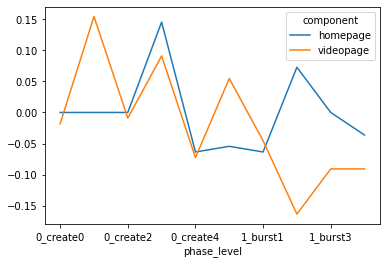

In [70]:
result_df_2.unstack(level=0).plot()
plt.show()